# Import packages and functions

In [1]:
import sys
# force the notebook to look for files in the upper level directory
sys.path.insert(1, '../')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up constants

In [3]:
METRICS_PATH = "../data/processed/model_metrics_comparison_with_raw.xlsx"
SCORING_METRICS = ["precision_weighted", "recall_weighted", "roc_auc", "f1_weighted"]
SAVE_PATH = "../plots/"
SAVE_PLOT = True

# Read in data

In [4]:
df_metrics = pd.read_excel(METRICS_PATH)
df_metrics

,model_type,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,XGBClassifier,Metal,precision_weighted,0.856068,0.010001,"[0.8557252905078991, 0.8524691358024691, 0.856..."
1,XGBClassifier,Metal,recall_weighted,0.857246,0.018841,"[0.8478260869565217, 0.8478260869565217, 0.866..."
2,XGBClassifier,Metal,roc_auc,0.864425,0.039227,"[0.8412162162162162, 0.8828828828828829, 0.879..."
3,XGBClassifier,Metal,f1_weighted,0.852532,0.010465,"[0.8418478260869564, 0.8479541588324827, 0.858..."
4,XGBClassifier,Insulator,precision_weighted,0.831626,0.021381,"[0.8260869565217391, 0.827273497754047, 0.7995..."
...,...,...,...,...,...,...
91,GradientBoostingClassifier,MIT,f1_weighted,0.838030,0.025702,"[0.8463589743589742, 0.8213981244671781, 0.830..."
92,GradientBoostingClassifier,Multiclass,precision_weighted,0.766853,0.030116,"[0.7450076209667003, 0.7333333333333333, 0.725..."
93,GradientBoostingClassifier,Multiclass,recall_weighted,0.755556,0.020773,"[0.6956521739130435, 0.7333333333333333, 0.733..."
94,GradientBoostingClassifier,Multiclass,roc_auc_ovr_weighted,0.893213,0.013733,"[0.8746664846664847, 0.8932532532532532, 0.895..."


In [5]:
df_metrics["raw_metric"] = pd.eval(df_metrics["raw_metric"])

# Summary plot

## Bar plot version

In [6]:
df_for_plot = df_metrics.replace(
    {"metric_name": {"roc_auc_ovr_weighted": "roc_auc"}}).sort_values(by="metric_value", ignore_index=True, ascending=False)

/Users/jasonrpw/PycharmProjects/mit_model_code/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 720x720 with 0 Axes>

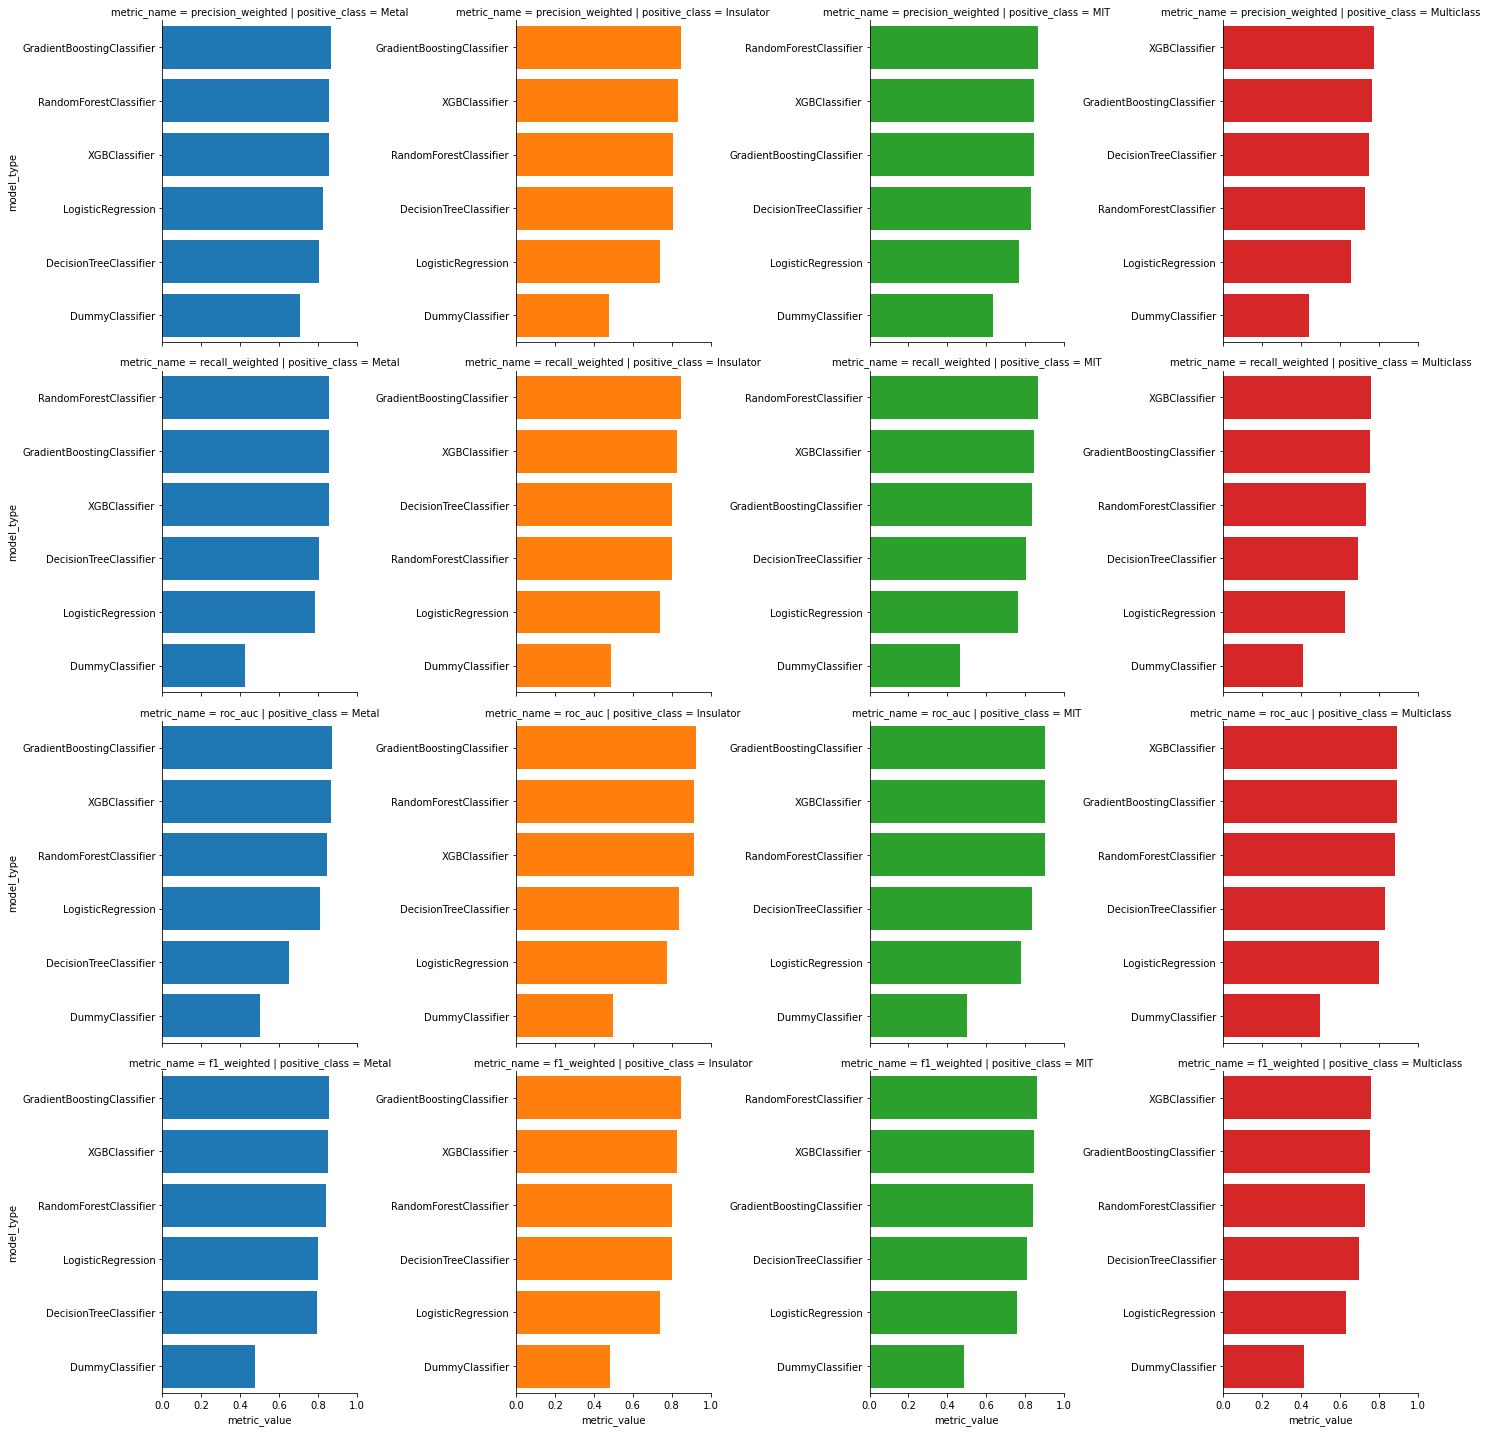

In [7]:
plt.figure(figsize=(10,10))
g_bar = sns.FacetGrid(df_for_plot, col="positive_class", row="metric_name", height=5, sharey=False,
                  col_order=["Metal", "Insulator", "MIT", "Multiclass"], row_order=SCORING_METRICS, 
                  hue="positive_class", hue_order=["Metal", "Insulator", "MIT", "Multiclass"],
                  xlim=(0, 1))
model_comparison_bar = g_bar.map(sns.barplot, "metric_value", "model_type", saturation=1)

In [8]:
def autolabel_bar(ax, **kwargs):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    
    Code adapted from https://matplotlib.org/3.3.1/gallery/lines_bars_and_markers/barchart.html
    """
    for rect in ax.patches:
        width = rect.get_width()
        x, y, xerrs = get_errorbars(**kwargs)
        ax.errorbar(x, y, xerr=xerrs, capsize=3, ls="none", ecolor="black")
        ax.annotate('{:.4f}'.format(width),
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(-1, -12),
                    textcoords="offset points",
                    ha='right', va='center', fontsize=10, color="white")

        
def get_errorbars(metric_name, positive_class, df_input=df_for_plot):
    """Attach errorbars to each sub-barplot"""
    df_selected = df_input.loc[(df_input.metric_name == metric_name) & (df_input.positive_class == positive_class)]
    x_pos = df_selected.metric_value
    y_pos = range(len(df_selected.model_type))
    x_errs = df_selected.metric_dispersion / 2
    return x_pos, y_pos, x_errs

In [9]:
for (metric, pos_class), ax in g_bar.axes_dict.items():
    ax.set_ylabel(None)
    autolabel_bar(ax, metric_name=metric, positive_class=pos_class)

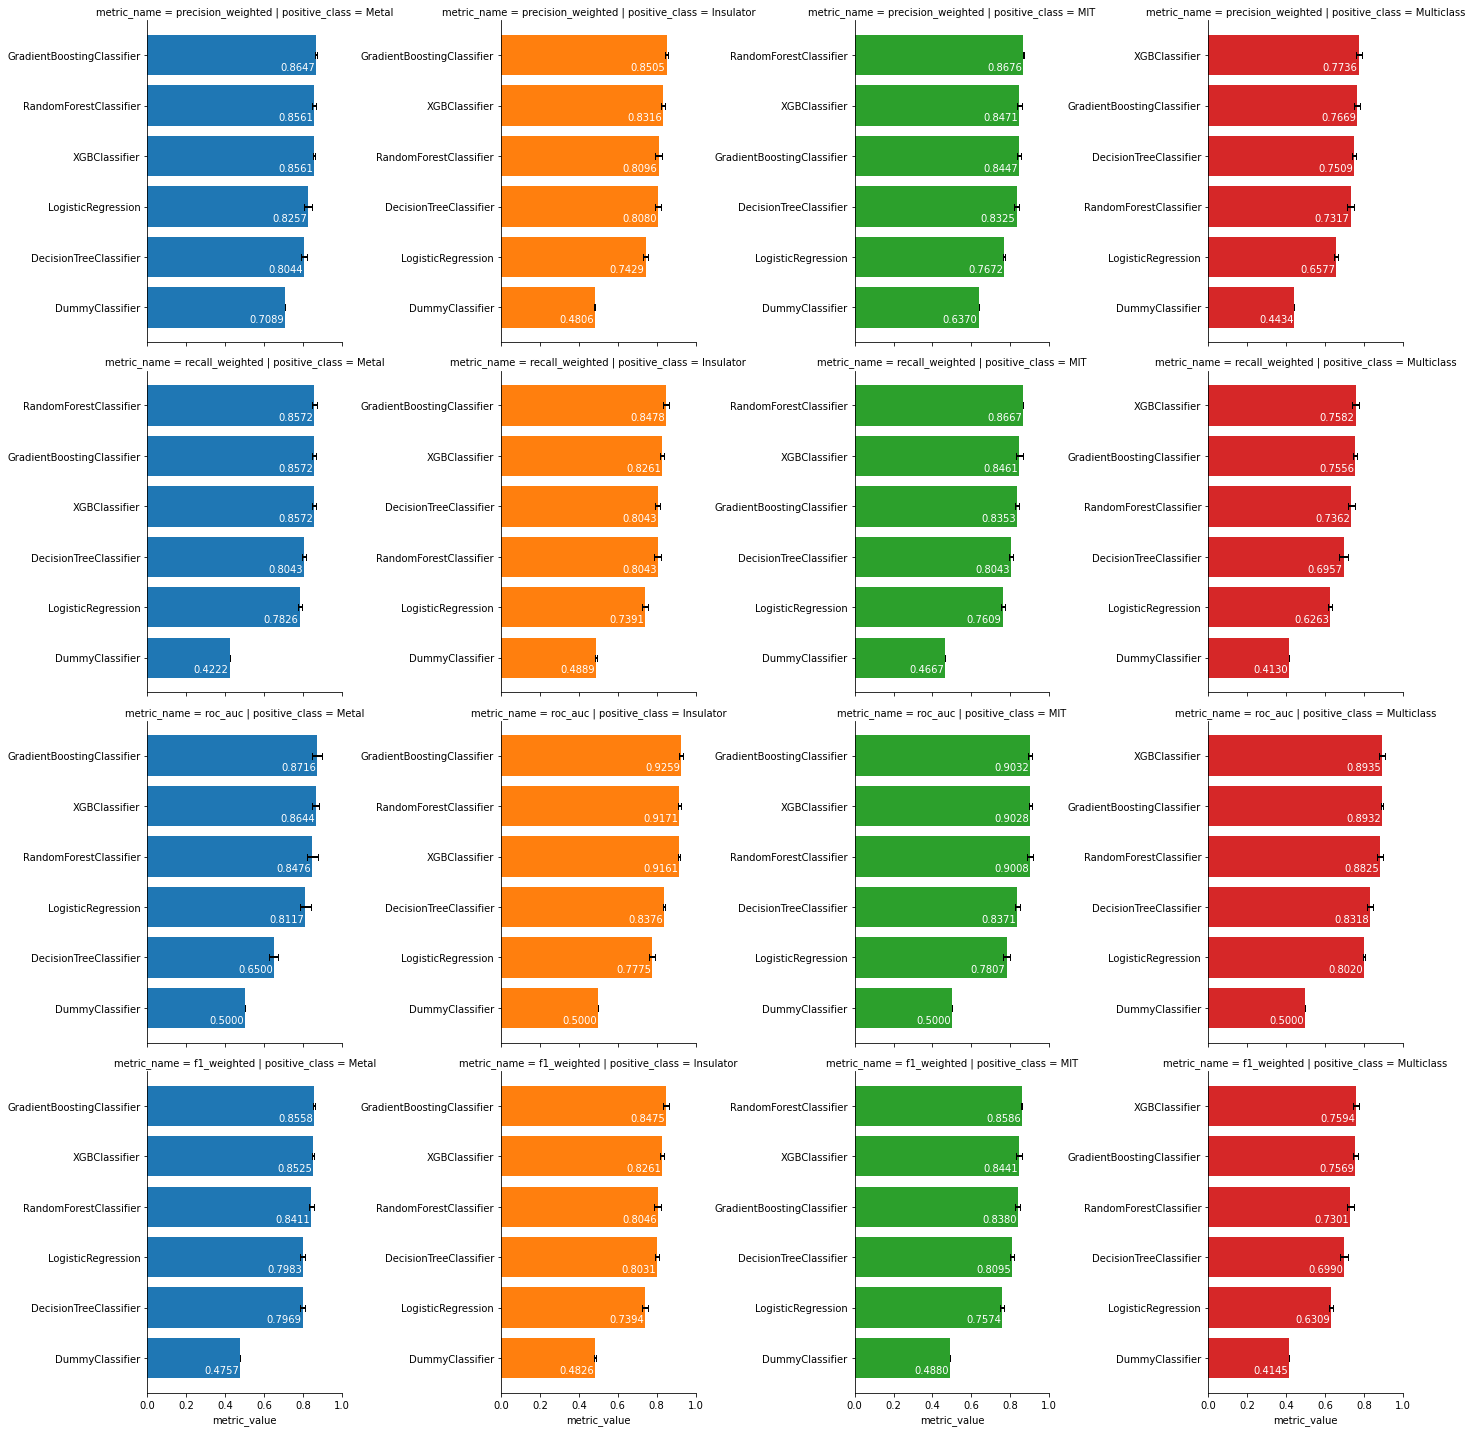

In [10]:
model_comparison_bar.fig

In [11]:
if SAVE_PLOT: model_comparison_bar.fig.savefig("../plots/model_comparison_bar.pdf", dpi=300, bbox_inches="tight")

## Boxplot version

In [12]:
df_for_boxplot = df_for_plot.drop(columns=["metric_dispersion"]).explode(column="raw_metric", ignore_index=True)
df_for_boxplot

,model_type,positive_class,metric_name,metric_value,raw_metric
0,GradientBoostingClassifier,Insulator,roc_auc,0.925857,0.898
1,GradientBoostingClassifier,Insulator,roc_auc,0.925857,0.935238
2,GradientBoostingClassifier,Insulator,roc_auc,0.925857,0.929524
3,GradientBoostingClassifier,Insulator,roc_auc,0.925857,0.88381
4,GradientBoostingClassifier,Insulator,roc_auc,0.925857,0.910476
...,...,...,...,...,...
955,DummyClassifier,Multiclass,recall_weighted,0.413043,0.413043
956,DummyClassifier,Multiclass,recall_weighted,0.413043,0.413043
957,DummyClassifier,Multiclass,recall_weighted,0.413043,0.413043
958,DummyClassifier,Multiclass,recall_weighted,0.413043,0.413043


/Users/jasonrpw/PycharmProjects/mit_model_code/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jasonrpw/PycharmProjects/mit_model_code/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jasonrpw/PycharmProjects/mit_model_code/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments with

<Figure size 720x720 with 0 Axes>

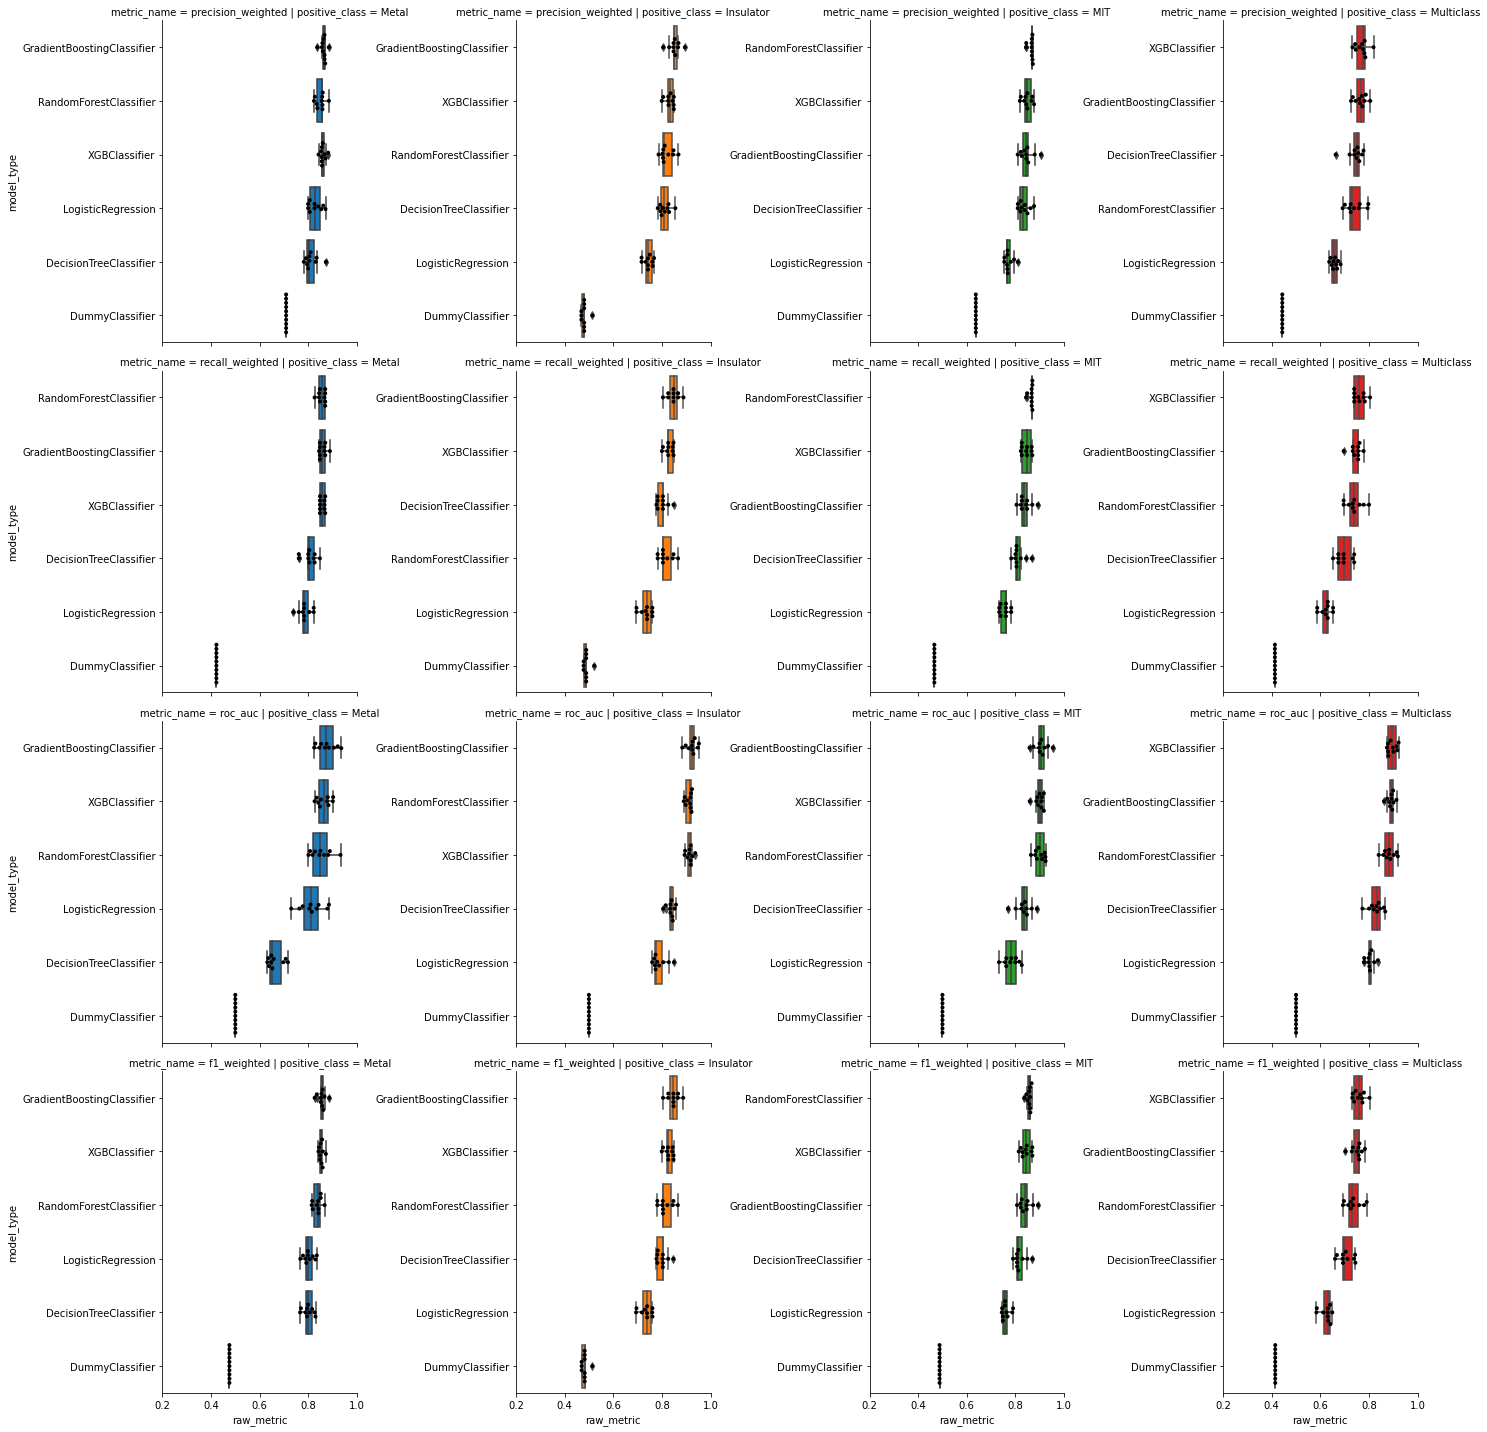

In [13]:
plt.figure(figsize=(10,10))

def fixed_boxplot(*args, label=None, **kwargs):
    """
    Custom boxplot function as a workaround for label error when sns.boxplot is passed to FacetGrid
    Adapted from https://github.com/mwaskom/seaborn/issues/915
    """
    sns.boxplot(*args, **kwargs, labels=[label])
    
g_box = sns.FacetGrid(data=df_for_boxplot, col="positive_class", row="metric_name", height=5, sharey=False, #aspect=2,
                      col_order=["Metal", "Insulator", "MIT", "Multiclass"], row_order=SCORING_METRICS, 
                      hue="positive_class", hue_order=["Metal", "Insulator", "MIT", "Multiclass"],
                      xlim=(0.2, 1))
model_comparison_boxplot = g_box.map(fixed_boxplot, "raw_metric", "model_type", saturation=1)
# overlay swarmplots on top of boxplots
g_box.map(sns.swarmplot, "raw_metric", "model_type", color="black", size=4)

In [14]:
def autolabel_box(ax, **kwargs):
    """
    Attach a text label besides each model type name, displaying the median value for the boxplot.
    
    Code adapted from https://matplotlib.org/3.3.1/gallery/lines_bars_and_markers/barchart.html
    """
    x_lst, y_lst, metric_lst = get_stats(**kwargs)
    for x, y, metric in zip(x_lst, y_lst, metric_lst):
        ax.annotate('{:.4f}'.format(metric),
                    xy=(x, y),
                    xytext=(-5, 0),
                    textcoords="offset points",
                    ha='left', va='center', fontsize=10, color="black")
    
        
def get_stats(metric_name, positive_class, df_input=df_for_plot, text_h_pos=0.24):
    """Get the stats to each sub-barplot"""
    df_selected = df_input.loc[(df_input.metric_name == metric_name) & (df_input.positive_class == positive_class)]
    num_models = len(df_selected.model_type)
    x_pos = [text_h_pos] * num_models
    y_pos = range(num_models)
    metric_values = df_selected.metric_value
    return x_pos, y_pos, metric_values

In [15]:
for (metric, pos_class), ax in g_box.axes_dict.items():
    ax.set_ylabel(None)
    autolabel_box(ax, metric_name=metric, positive_class=pos_class)

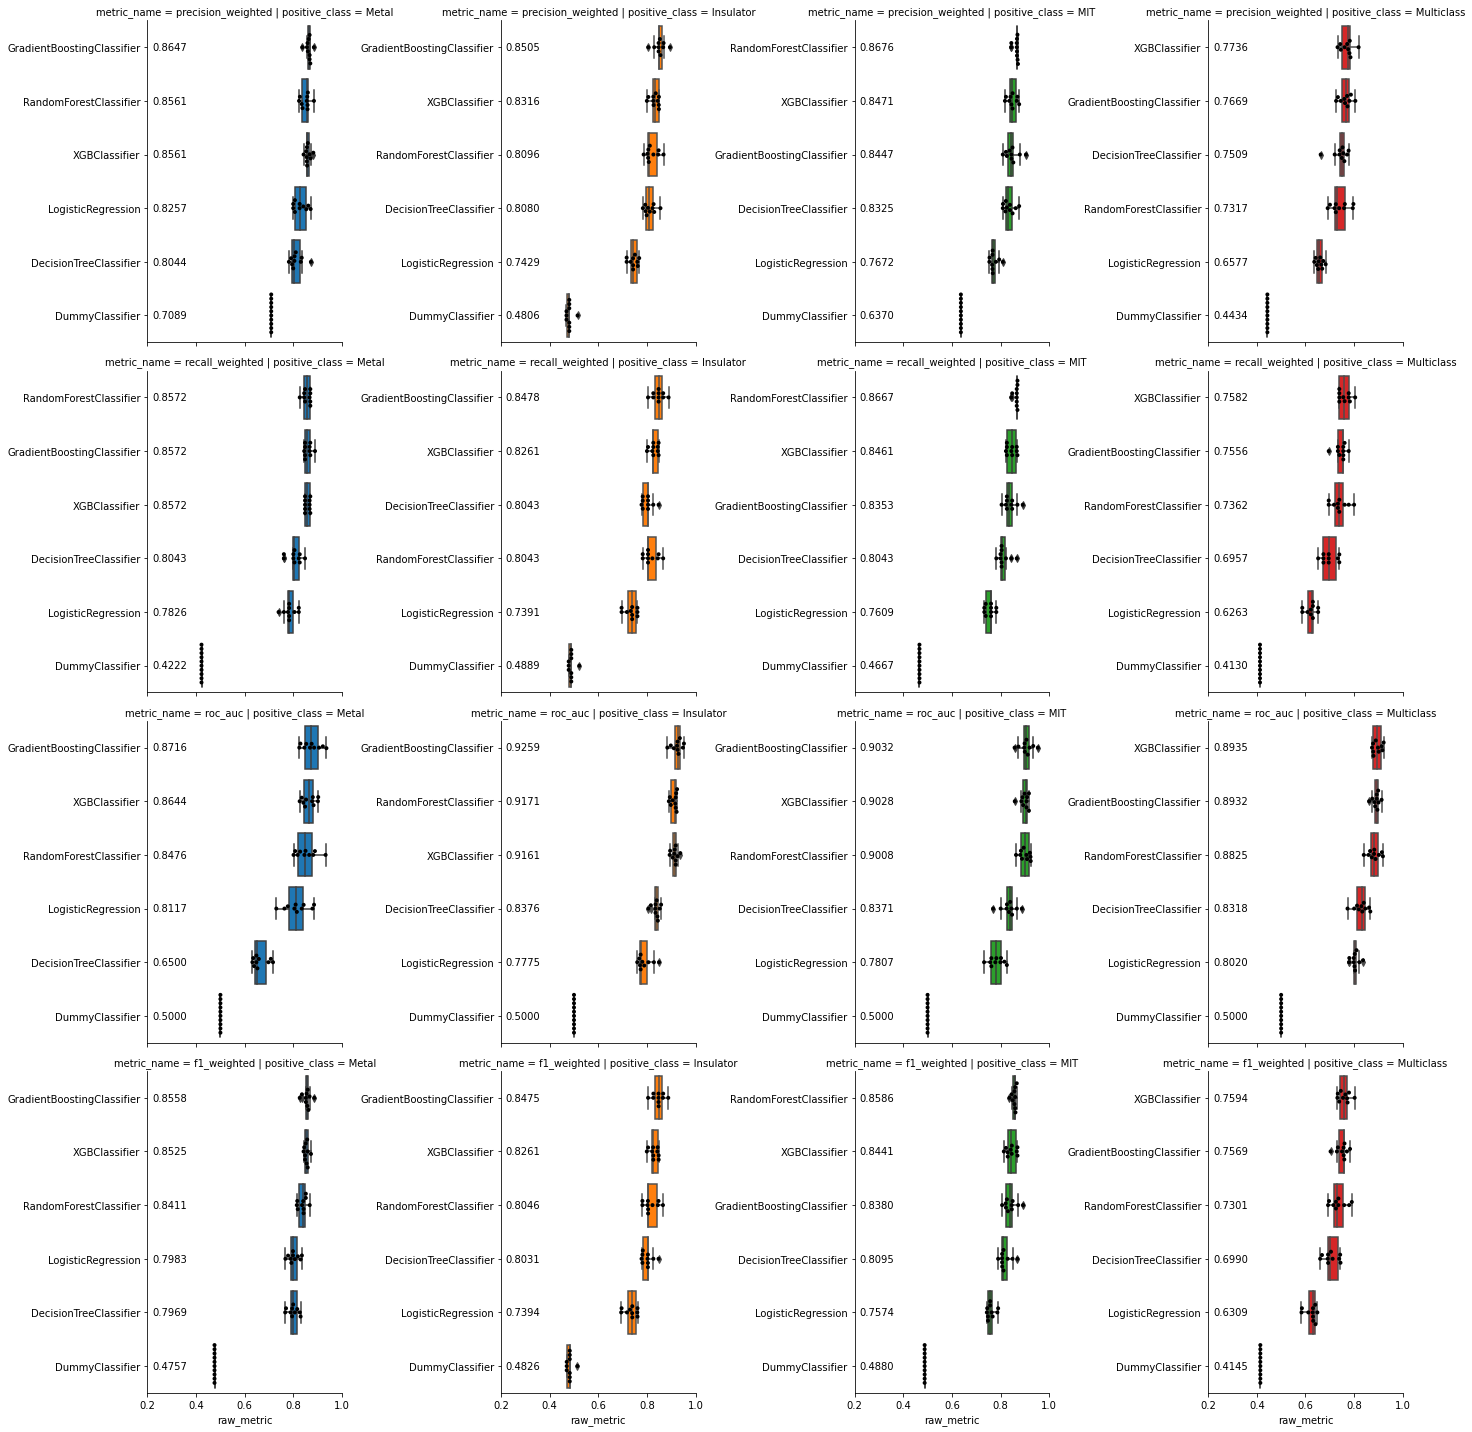

In [16]:
model_comparison_boxplot.fig

In [17]:
if SAVE_PLOT: model_comparison_boxplot.fig.savefig(SAVE_PATH + "model_comparison_boxplot.pdf", dpi=300, bbox_inches="tight")

# Data exploration

In [18]:
df_metrics.loc[df_metrics.model_type == "XGBClassifier"]

,model_type,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,XGBClassifier,Metal,precision_weighted,0.856068,0.010001,"[0.8557252905078991, 0.8524691358024691, 0.856..."
1,XGBClassifier,Metal,recall_weighted,0.857246,0.018841,"[0.8478260869565217, 0.8478260869565217, 0.866..."
2,XGBClassifier,Metal,roc_auc,0.864425,0.039227,"[0.8412162162162162, 0.8828828828828829, 0.879..."
3,XGBClassifier,Metal,f1_weighted,0.852532,0.010465,"[0.8418478260869564, 0.8479541588324827, 0.858..."
4,XGBClassifier,Insulator,precision_weighted,0.831626,0.021381,"[0.8260869565217391, 0.827273497754047, 0.7995..."
5,XGBClassifier,Insulator,recall_weighted,0.826087,0.021256,"[0.8260869565217391, 0.8260869565217391, 0.8, ..."
6,XGBClassifier,Insulator,roc_auc,0.916143,0.010500,"[0.8952380952380952, 0.9142857142857143, 0.893..."
7,XGBClassifier,Insulator,f1_weighted,0.826087,0.021074,"[0.8260869565217391, 0.8250836120401338, 0.799..."
8,XGBClassifier,MIT,precision_weighted,0.847074,0.024828,"[0.8449488491048593, 0.8491987179487179, 0.876..."
9,XGBClassifier,MIT,recall_weighted,0.846135,0.035870,"[0.8478260869565217, 0.8478260869565217, 0.866..."


In [19]:
def rank_metrics(metric_name, class_type, df_input=df_metrics):
    return df_input.loc[(df_input.positive_class == class_type) & (df_input.metric_name == metric_name)].sort_values(by="metric_value", ascending=False, ignore_index=True)

In [20]:
rank_metrics("precision_weighted", "MIT")

,model_type,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,RandomForestClassifier,MIT,precision_weighted,0.867568,0.002399,"[0.8716542629586108, 0.8675675675675676, 0.867..."
1,XGBClassifier,MIT,precision_weighted,0.847074,0.024828,"[0.8449488491048593, 0.8491987179487179, 0.876..."
2,GradientBoostingClassifier,MIT,precision_weighted,0.844665,0.022685,"[0.8491987179487179, 0.8443817052512704, 0.837..."
3,DecisionTreeClassifier,MIT,precision_weighted,0.832471,0.026363,"[0.8388543823326432, 0.8388543823326432, 0.849..."
4,LogisticRegression,MIT,precision_weighted,0.767204,0.011709,"[0.7676190476190476, 0.7943899018232818, 0.765..."
5,DummyClassifier,MIT,precision_weighted,0.636975,0.000000,"[0.6369747899159663, 0.6369747899159663, 0.636..."


In [21]:
rank_metrics("recall_weighted", "MIT")

,model_type,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,RandomForestClassifier,MIT,recall_weighted,0.866667,0.002174,"[0.8695652173913043, 0.8666666666666667, 0.866..."
1,XGBClassifier,MIT,recall_weighted,0.846135,0.035870,"[0.8478260869565217, 0.8478260869565217, 0.866..."
2,GradientBoostingClassifier,MIT,recall_weighted,0.835266,0.021739,"[0.8444444444444444, 0.8260869565217391, 0.826..."
3,DecisionTreeClassifier,MIT,recall_weighted,0.804348,0.016667,"[0.8043478260869565, 0.8043478260869565, 0.822..."
4,LogisticRegression,MIT,recall_weighted,0.760870,0.021739,"[0.7608695652173914, 0.782608695652174, 0.7333..."
5,DummyClassifier,MIT,recall_weighted,0.466667,0.000000,"[0.4666666666666667, 0.4666666666666667, 0.466..."


In [22]:
rank_metrics("roc_auc", "MIT")

,model_type,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,GradientBoostingClassifier,MIT,roc_auc,0.903166,0.019511,"[0.898989898989899, 0.9191919191919192, 0.9117..."
1,XGBClassifier,MIT,roc_auc,0.902778,0.017434,"[0.8857808857808858, 0.9065656565656566, 0.916..."
2,RandomForestClassifier,MIT,roc_auc,0.900835,0.032925,"[0.9207459207459208, 0.8838383838383839, 0.895..."
3,DecisionTreeClassifier,MIT,roc_auc,0.837103,0.021198,"[0.8005050505050504, 0.8263403263403264, 0.867..."
4,LogisticRegression,MIT,roc_auc,0.780692,0.039040,"[0.8018648018648019, 0.7323232323232323, 0.782..."
5,DummyClassifier,MIT,roc_auc,0.500000,0.000000,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."


In [23]:
rank_metrics("f1_weighted", "MIT")

,model_type,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,RandomForestClassifier,MIT,f1_weighted,0.858644,0.008359,"[0.860144927536232, 0.8571428571428571, 0.8571..."
1,XGBClassifier,MIT,f1_weighted,0.844071,0.032009,"[0.8459182349123945, 0.8463589743589742, 0.869..."
2,GradientBoostingClassifier,MIT,f1_weighted,0.838030,0.025702,"[0.8463589743589742, 0.8213981244671781, 0.830..."
3,DecisionTreeClassifier,MIT,f1_weighted,0.809454,0.018538,"[0.8121076954912284, 0.8121076954912284, 0.829..."
4,LogisticRegression,MIT,f1_weighted,0.757404,0.018374,"[0.7574039067422811, 0.7869759316770187, 0.743..."
5,DummyClassifier,MIT,f1_weighted,0.488000,0.000000,"[0.48799999999999993, 0.48799999999999993, 0.4..."
